<a href="https://colab.research.google.com/github/rlberry-py/rlberry/blob/main/notebooks/Experimental_pipeline_with_rlberry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Experimental pipeline with `rlberry`

In this notebook, you will see:

* How to use the `AgentStats` class to compare two deep RL algorithms: `A2C` and `PPO`
* How `AgentStats` can optimize hyperparameters with one line of code (thanks to `Optuna`).
* How to save all the parameters of the experiments in a `config.json` file (using `sacred`).

# Colab setup

In [ ]:
# install rlberry library, full version
!git clone https://github.com/rlberry-py/rlberry.git 
!cd rlberry && git pull && pip install -e .[full] > /dev/null 2>&1

# install ffmpeg-python for saving videos
!pip install ffmpeg-python > /dev/null 2>&1

# install optuna for hyperparameter optimization
!pip install optuna > /dev/null 2>&1

# packages required to show video
!pip install pyvirtualdisplay > /dev/null 2>&1
!apt-get install -y xvfb python-opengl ffmpeg > /dev/null 2>&1

print("")
print(" ~~~  Libraries installed, please restart the runtime! ~~~ ")
print("")

fatal: destination path 'rlberry' already exists and is not an empty directory.
Already up to date.

 ~~~  Libraries installed, please restart the runtime! ~~~ 



# Imports and experiment setup

In [ ]:
import rlberry.seeding as seeding
from rlberry.agents import PPOAgent, A2CAgent
from rlberry.envs.benchmarks.ball_exploration.ball2d import get_benchmark_env
from rlberry.stats import AgentStats, compare_policies, plot_episode_rewards
from sacred import Experiment
from sacred.observers import FileStorageObserver

from sacred import SETTINGS
SETTINGS['CAPTURE_MODE'] = 'sys' # workaround to avoid problems with sacred + multiprocessing (https://github.com/IDSIA/sacred/issues/711)

# Create experiment
ex = Experiment('demo_ppo_vs_a2c', interactive=True)  # interactive only for the notebook

# Create output folder to store configs
fs_observer = FileStorageObserver.create("experiment_dir")
ex.observers.append(fs_observer)

In [ ]:
@ex.config
def cfg():
    """
    Defines experiment parameters, using the Sacred library.
    See Sacred documentation at https://sacred.readthedocs.io/en/stable/
    """
    params = {}
    params['ppo'] = {
                    "n_episodes": 100,
                    "gamma": 0.99,
                    "horizon": 50,
                    "learning_rate": 0.0003
                    }

    params['a2c'] = {
                    "n_episodes": 100,
                    "gamma": 0.99,
                    "horizon": 50,
                    "learning_rate": 0.0003
                    }

    optimize_hyperparams = True

    rlberry_seed = 123


# Run experiment

INFO - demo_ppo_vs_a2c - Running command 'run_experiment'
INFO - demo_ppo_vs_a2c - Started run with ID "5"
[I 2020-11-28 22:20:56,203] A new study created in memory with name: no-name-ac102e8a-e4e9-4074-b5e1-dba8bb7880d7
[I 2020-11-28 22:21:01,581] Trial 1 pruned. 
[I 2020-11-28 22:21:02,347] Trial 0 finished with value: 17.382293429581892 and parameters: {'batch_size': 8, 'learning_rate': 0.030917443925223685}. Best is trial 0 with value: 17.382293429581892.
[I 2020-11-28 22:21:06,717] Trial 2 pruned. 
[I 2020-11-28 22:21:06,986] Trial 3 pruned. 
[I 2020-11-28 22:21:07,058] A new study created in memory with name: no-name-62489a4b-08c8-4da2-b7f4-44f6c2c29892


Number of finished trials:  4
Best trial:
Value:  17.382293429581892
Params: 
    batch_size: 8
    learning_rate: 0.030917443925223685


[I 2020-11-28 22:21:13,069] Trial 0 finished with value: 2.376266062333506 and parameters: {'batch_size': 64, 'learning_rate': 0.0003639323504953473}. Best is trial 0 with value: 2.376266062333506.
[I 2020-11-28 22:21:14,558] Trial 1 finished with value: 13.676505892756168 and parameters: {'batch_size': 4, 'learning_rate': 0.0005354382904356551}. Best is trial 1 with value: 13.676505892756168.
[I 2020-11-28 22:21:15,998] Trial 2 pruned. 
[I 2020-11-28 22:21:20,007] Trial 3 pruned. 
[I 2020-11-28 22:21:20,629] Trial 4 finished with value: 16.360456786816346 and parameters: {'batch_size': 32, 'learning_rate': 0.0038090157341116684}. Best is trial 4 with value: 16.360456786816346.


Number of finished trials:  5
Best trial:
Value:  16.360456786816346
Params: 
    batch_size: 32
    learning_rate: 0.0038090157341116684

 Training AgentStats for PPO... 



[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:   14.6s remaining:   14.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.9s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:   14.9s finished
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.



 ... trained! 


 Training AgentStats for A2C... 



[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:    5.6s remaining:    5.6s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.7s remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed:    5.7s finished



 ... trained! 



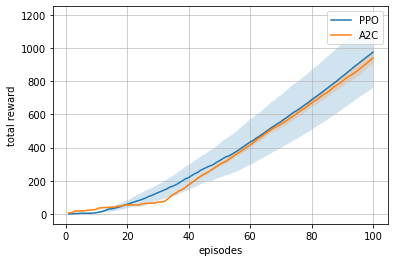

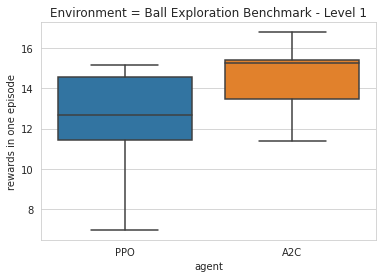

INFO - demo_ppo_vs_a2c - Completed after 0:00:46


         PPO        A2C
0   6.969469  15.372098
1  15.180296  16.120491
2  14.988639  15.226920
3  15.057672  13.516891
4  13.338193  15.421509
5  12.320937  15.278921
6  11.263593  16.787525
7  13.060811  11.372292
8  10.007426  13.472772
9  11.908000  13.329104


In [ ]:
@ex.main
def run_experiment(rlberry_seed,
                   params,
                   optimize_hyperparams):
    """
    Main experiment function
    """   
    # Set seed
    seeding.set_global_seed(rlberry_seed)
    # Choose environment
    env = get_benchmark_env(level=1)

    # Initialize AgentStats
    stats = {}
    stats['ppo'] = AgentStats(PPOAgent,
                              env,
                              init_kwargs=params['ppo'],
                              eval_horizon=params['ppo']['horizon'],
                              n_fit=4)

    stats['a2c'] = AgentStats(A2CAgent,
                              env,
                              init_kwargs=params['a2c'],
                              eval_horizon=params['a2c']['horizon'],
                              n_fit=4)

    agent_stats_list = stats.values()

    # Optimize hyperparameters
    # For more information on how optimize_hyperparams work,
    # readers are invited to consult the documentation of Optuna:
    # https://optuna.readthedocs.io/en/stable/
    if optimize_hyperparams:
        for stats in agent_stats_list:
            # timeout after 10 seconds
            stats.optimize_hyperparams(n_trials=50, timeout=10, n_fit=1)

    # Learning curves
    plot_episode_rewards(agent_stats_list, cumulative=True, show=False)

    # Compare final policies
    output = compare_policies(agent_stats_list, n_sim=10)
    print(output)


ex.run()

# Check output  `config.json`

In [ ]:
!cat experiment_dir/1/config.json

{
  "__doc__": "\nDefines experiment parameters, using the Sacred library.\nSee Sacred documentation at https://sacred.readthedocs.io/en/stable/\n",
  "optimize_hyperparams": true,
  "params": {
    "a2c": {
      "gamma": 0.99,
      "horizon": 50,
      "learning_rate": 0.0003,
      "n_episodes": 100
    },
    "ppo": {
      "gamma": 0.99,
      "horizon": 50,
      "learning_rate": 0.0003,
      "n_episodes": 100
    }
  },
  "seed": 884188587
}